In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, zero_one_loss, accuracy_score

## Load training and testing zip code data

In [2]:
def load_data(file_path):
    data = np.loadtxt(file_path)
    digit_labels = data[:, 0]
    digit_values = data[:, 1:]
    return digit_labels, digit_values

# Load training data
train_labels, train_data = load_data('zip.train')  
# Load testing data
test_labels, test_data = load_data('zip.test') 

In [3]:
print(train_labels[1])
print(train_data[1,:])

5.0
[-1.    -1.    -1.    -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 -1.
 -1.    -0.774 -0.18   0.052 -0.241 -1.    -1.    -1.    -1.     0.392
  1.     0.857  0.727  1.     0.805  0.613  0.613  0.86   1.     1.
  0.396 -1.    -1.    -1.    -1.    -0.548  1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     0.875 -0.957 -1.    -1.
 -1.    -0.786  0.961  1.     1.     1.     0.727  0.403  0.403  0.171
 -0.314 -0.314 -0.94  -1.    -1.    -1.    -1.    -0.298  1.     1.
  1.     0.44   0.056 -0.755 -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.     0.366  1.     1.     1.     1.     1.     0.889
 -0.081 -0.92  -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.396
  0.886  0.974  0.851  0.851  0.95   1.     1.     0.539 -0.754 -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -0.886 -0.505 -1.    -1.
 -0.649  0.405  1.     1.     0.653 -0.838 -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.55   0.993
  1.     0.618 -0.869 -1.    

##  Tuning K-Nearest Neighbor model to find optimal k 

Average test error for 1 neighbor is 0.081 with std.deviation 0.017
Average test error for 2 neighbor is 0.099 with std.deviation 0.015
Average test error for 3 neighbor is 0.097 with std.deviation 0.017
Average test error for 4 neighbor is 0.100 with std.deviation 0.013
Average test error for 5 neighbor is 0.097 with std.deviation 0.016
Average test error for 6 neighbor is 0.104 with std.deviation 0.013
Average test error for 7 neighbor is 0.101 with std.deviation 0.013
Average test error for 8 neighbor is 0.105 with std.deviation 0.012
Average test error for 9 neighbor is 0.108 with std.deviation 0.014
Average test error for 10 neighbor is 0.113 with std.deviation 0.015
Average test error for 11 neighbor is 0.115 with std.deviation 0.021
Average test error for 12 neighbor is 0.122 with std.deviation 0.018
Average test error for 13 neighbor is 0.117 with std.deviation 0.016
Average test error for 14 neighbor is 0.121 with std.deviation 0.015
Average test error for 15 neighbor is 0.123

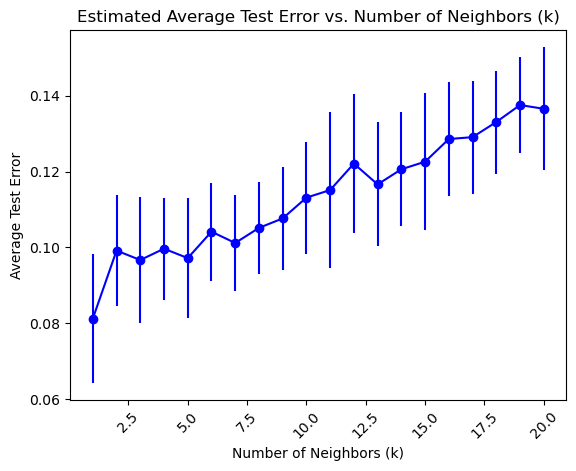

In [4]:
# Define zero one loss function for 5 five cross validation
zero_one = make_scorer(zero_one_loss)

# Define model evaluation using 5 fold cross valiation on kNN model
def evaluate_model(model, X, y):
    cv = KFold(n_splits=5,random_state=42, shuffle=True)
    scores = cross_val_score(model, X, y, scoring=zero_one, cv=cv)
    return scores

# create multiple kNN model with k values from 1 to 20 
def get_models():
    models = dict()
    for i in range(1,21):
        models[str(i)] = KNeighborsClassifier(n_neighbors=i)
    return models


# evaluate the different kNN models and compare results
models = get_models()
results_mean, results_std,names = list(),list(),  list()
for name, model in models.items():
    model.fit(train_data, train_labels)
    scores = evaluate_model(model, test_data, test_labels)
    results_mean.append(np.mean(scores))
    results_std.append(np.std(scores))
    names.append(name)
    print('Average test error for %s neighbor is %.3f with std.deviation %.3f' % (name, np.mean(scores), np.std(scores)))
# Plotting average test error as a function of k
plt.errorbar(np.arange(1,21), results_mean, yerr=results_std, marker='o', linestyle='-', color='b' )
plt.xticks(rotation=45)
plt.title('Estimated Average Test Error vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Test Error')
plt.show()

The KNN model with least average test error is with k = 1. Applying one standard error rule, we get two KNN models, with k = 3 and k =5 within one standard deviation of k = 1. 

## Fit final k-NN model k = 3  

In [5]:
# Task 7: Fit a Final k-NN Model
final_knn_3 = KNeighborsClassifier(n_neighbors=3)
final_knn_3.fit(train_data, train_labels)

# Use the final model for predictions on the test set
test_pred3 = final_knn_3.predict(test_data)

# Evaluate the accuracy
accuracy = accuracy_score(test_labels, test_pred3)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


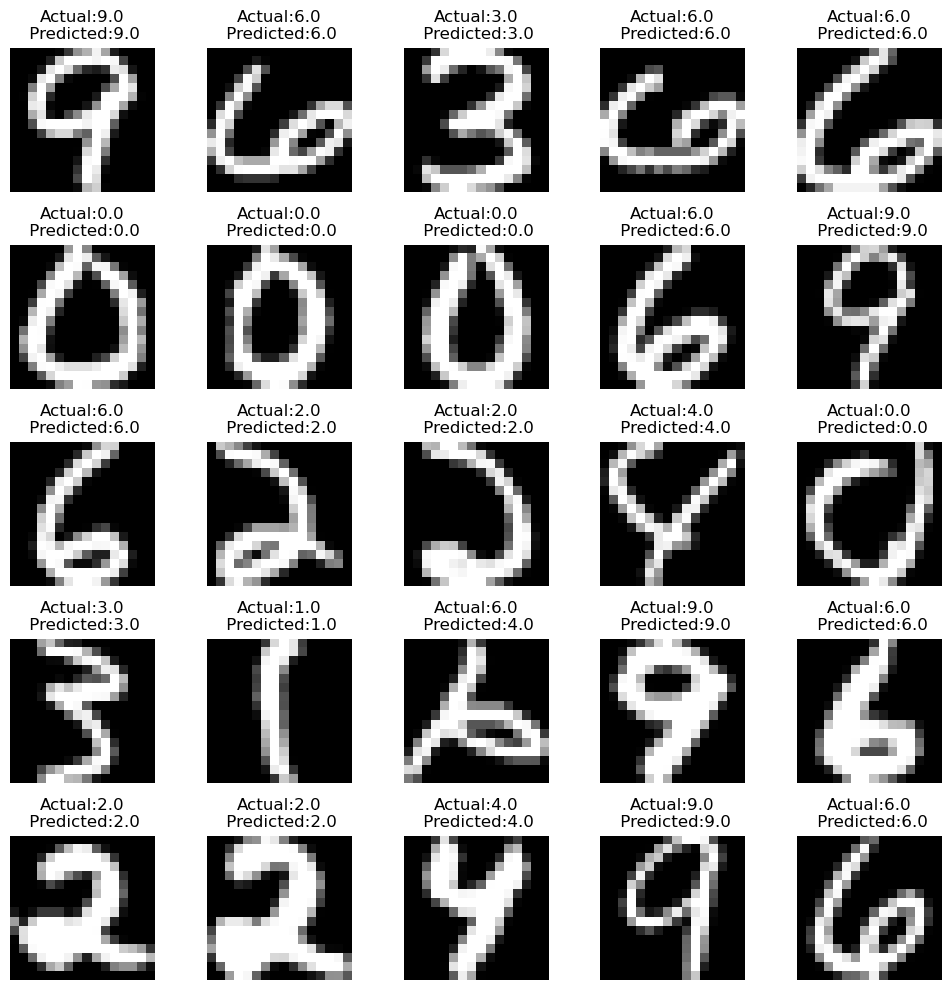

In [6]:
# Use trained model to test data
plt.figure(figsize=(10, 10))
num_samples_to_visualize = 25
for i in range(num_samples_to_visualize):
    plt.subplot(5, num_samples_to_visualize // 5, i + 1)
    plt.imshow(test_data[i].reshape(16, 16), cmap='gray')
    plt.title(f'Actual:{test_labels[i]}\n Predicted:{test_pred3[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Fit final k-NN model k = 5

In [7]:
# Fit a Final k-NN Model
final_knn_5 = KNeighborsClassifier(n_neighbors=5)
final_knn_5.fit(train_data, train_labels)

# Use the final model for predictions on the test set
test_pred5 = final_knn_5.predict(test_data)

# Evaluate the accuracy
accuracy = accuracy_score(test_labels, test_pred5)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


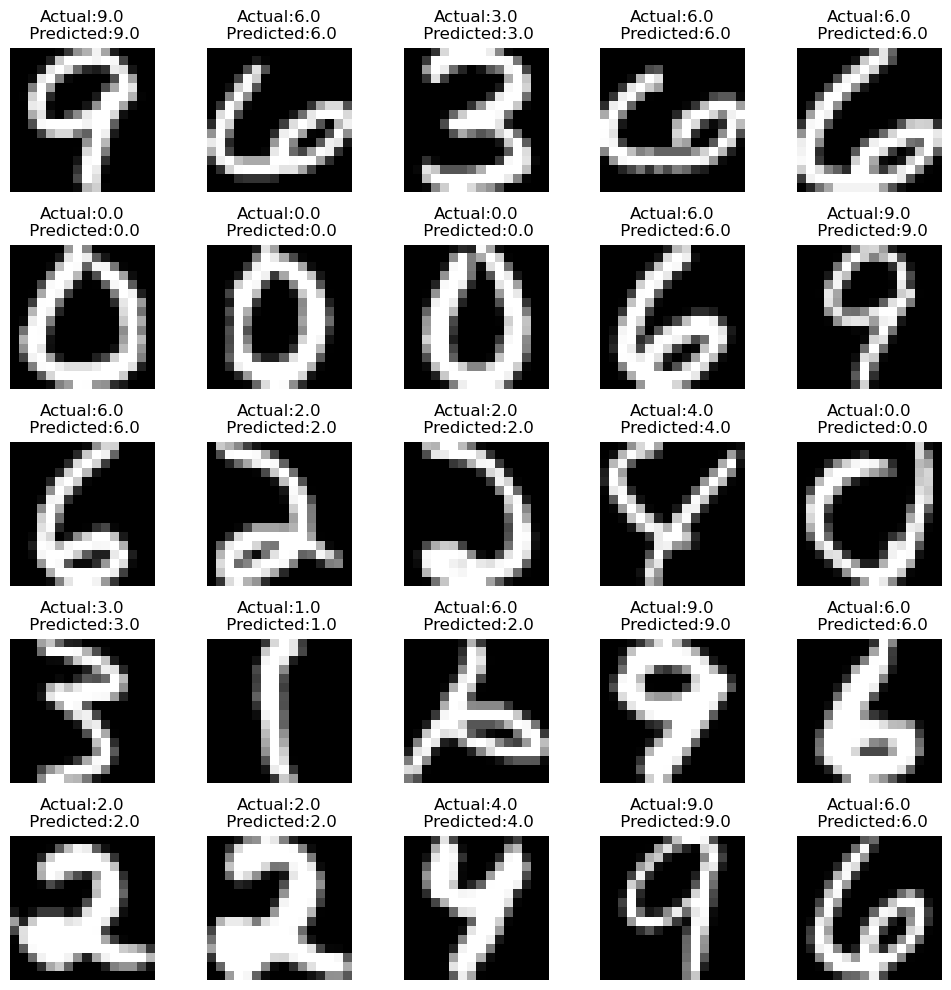

In [8]:
plt.figure(figsize=(10, 10))
num_samples_to_visualize = 25
for i in range(num_samples_to_visualize):
    plt.subplot(5, num_samples_to_visualize // 5, i + 1)
    plt.imshow(test_data[i].reshape(16, 16), cmap='gray')
    plt.title(f'Actual:{test_labels[i]}\n Predicted:{test_pred5[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Model with 3 nearest neighbor and model with 5 nearest neighbors give the same results for most of the test labels. The prediction accuracy is 94%

## Create confusion matrix for kNN model with k = 3 

Confusion Matrix:
[[355   0   3   0   0   0   0   0   0   1]
 [  0 258   0   0   3   0   2   1   0   0]
 [  8   0 183   1   1   0   0   2   3   0]
 [  3   0   2 153   0   6   0   1   0   1]
 [  0   2   0   0 183   2   2   2   1   8]
 [  5   0   3   3   0 144   0   0   1   4]
 [  3   1   1   0   2   0 163   0   0   0]
 [  0   1   1   1   4   0   0 138   1   1]
 [  4   0   3   4   0   1   0   1 151   2]
 [  2   0   0   0   3   0   0   4   0 168]]


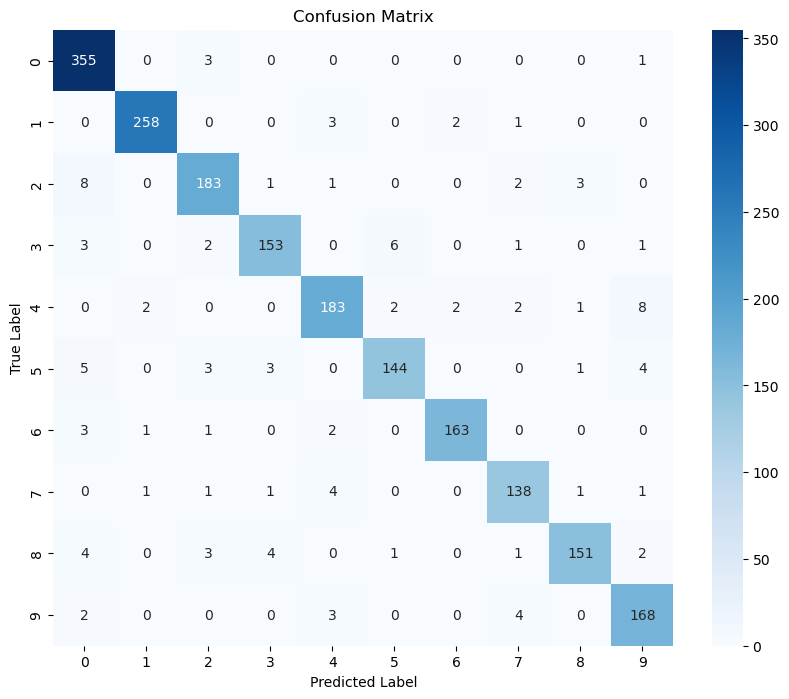

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels, test_pred3)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
conditional_test_error = zero_one_loss(test_labels, test_pred3)

print(f'Conditional Test Error (Zero-One Loss): {conditional_test_error:.2f}')

Conditional Test Error (Zero-One Loss): 0.06
